# Cabs Investment Analysis

## Overview

Company XYZ ,due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision

## Business problem

The Company aims to maximise profit on the Cab Industry by choosing the firm which has the maximum return.

### Objective

Identify which company is performing better and a better investment opportunity for company XYZ

### Specific objectives

* Identify which company has a higher profit margin
* find out if there is seasonality in number of cabs using the cab service
* Which city generates the highest profit
* Does gender affect the choice of cab
* To identify how customers of different ages use the cabs
* TO find out which cab has the highest demand
* 


## Data understanding

The datasets used include the following: 
* Cab_Data.csv – this file includes details of transaction for 2 cab companies
* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
* City.csv – this file contains list of US cities, their population and number of cab users


In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Cabs_data=pd.read_csv('Cab_Data.csv')
Cabs_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
Cabs_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [4]:
city = pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
pd.read_csv('City.csv').tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [6]:
Customer=pd.read_csv('Customer_ID.csv')
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
Customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [8]:
Transaction=pd.read_csv('Transaction_ID.csv')
Transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
# Letsmerge the Cab_Data Table and Transaction_Id
# Inorder to know the payment mode of each transaction
cab_trans=Cabs_data.merge(Transaction,how='left',on=['Transaction ID'])
cab_trans.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [10]:
# Lets Join the Customer and Cabs_trans table
# Inorder to get the customer info
cab_trans_cust= cab_trans.merge(Customer,how='left',on=['Customer ID','Customer ID'])
cab_trans_cust.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [11]:
# Lets join  
cab_trans_cust_city = cab_trans_cust.merge(city,how='left',on=['City'])
cab_trans_cust_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [12]:
cab_trans_cust_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


* There 13 columns in the data
* The population and users column are objects we need to convert them to objects

In [13]:
cab_trans_cust_city.drop(['Date of Travel'],axis=1,inplace=True)

In [14]:
cab_trans_cust_city['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [15]:
cab_trans_cust_city['City'].value_counts()


NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

* The data has two companies the yellow and pink cab
* The data has 20 cities

In [16]:
cab_trans_cust_city.set_index(['Transaction ID'],inplace=True)

### Data Preparation

This section will include:
* Checking for missing values
* Checking for duplicates
* Checking for outliers
* Checking for uniformity 

#### Checking for uniformity

In [17]:
cab_trans_cust_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   City                359392 non-null  object 
 2   KM Travelled        359392 non-null  float64
 3   Price Charged       359392 non-null  float64
 4   Cost of Trip        359392 non-null  float64
 5   Customer ID         359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income (USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 35.6+ MB


In [18]:
cab_trans_cust_city['Customer ID']=cab_trans_cust_city['Customer ID'].astype(str)

In [19]:
cab_trans_cust_city['Population']=cab_trans_cust_city['Population'].apply(lambda x: x.replace(',',''))
cab_trans_cust_city['Users']=cab_trans_cust_city['Users'].apply(lambda x: x.replace(',',''))

In [20]:
cab_trans_cust_city['Population']=cab_trans_cust_city['Population'].astype(int)
cab_trans_cust_city['Users']=cab_trans_cust_city['Users'].astype(int)

#### checking for missing values

In [21]:
cab_trans_cust_city.isna().sum()

Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

the dataframe has no missing values

#### checking for consistency

In [22]:
cab_trans_cust_city.duplicated().sum()

0

the dataframe has no duplicates

#### checking for outliers

<AxesSubplot:>

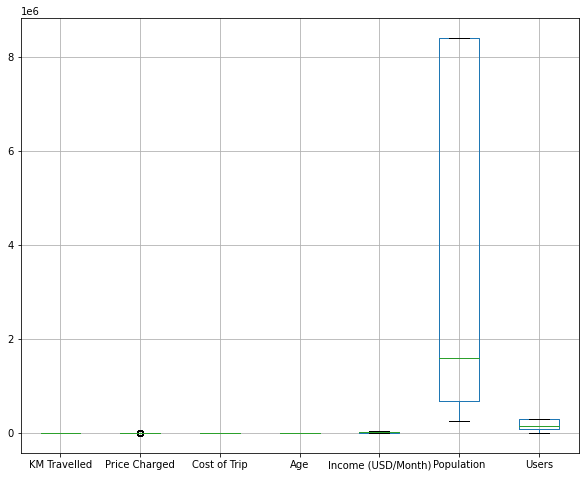

In [23]:
# checking for outliers
cab_trans_cust_city.boxplot(figsize=(10,8))

There are no outliers in the data

##### feature engineering

In [24]:
#Lets divise the profit column
cab_trans_cust_city['profit']=cab_trans_cust_city['Price Charged'] - cab_trans_cust_city['Cost of Trip']
cab_trans_cust_city.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit
Transaction ID,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844


In [25]:
# summary statistics
cab_trans_cust_city.describe()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users,profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,12.233526,274.378911,157.993661,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,12.000000,206.437500,151.200000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,22.440000,386.360000,282.480000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,32.960000,583.660000,413.683200,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


In [26]:
# Lets bin the ages column
# The age brackets will be kids,adults,middleaged,old
cab_trans_cust_city.loc[(cab_trans_cust_city.Age)<20,'Age Group'] = 'Kid'
cab_trans_cust_city.loc[((cab_trans_cust_city.Age>= 20)&(cab_trans_cust_city.Age<40)), 'Age Group' ] = 'Young adult'
cab_trans_cust_city.loc[((cab_trans_cust_city.Age>=40)&(cab_trans_cust_city.Age<60)), 'Age Group' ] = 'Middle aged'
cab_trans_cust_city.loc[(cab_trans_cust_city.Age)>=60 , 'Age Group'] = 'elderly'

In [27]:
cab_trans_cust_city.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,Age Group
Transaction ID,,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,Young adult
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,Young adult
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,Middle aged
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,Young adult
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,Young adult


In [28]:
#Calculating the profit margin
cab_trans_cust_city['profit margin']=cab_trans_cust_city['profit']/cab_trans_cust_city['Price Charged']

In [29]:
# Lets bin the income groups 
# Find the yearly income
cab_trans_cust_city['yr_income']=cab_trans_cust_city['Income (USD/Month)'] * 12
# bin the income groups depending on the years income
cab_trans_cust_city.loc[cab_trans_cust_city.yr_income < 32048,'Income group']= 'Poor'
cab_trans_cust_city.loc[(cab_trans_cust_city.yr_income > 32048)&(cab_trans_cust_city.yr_income < 53413),'Income group']='Lower-middle'
cab_trans_cust_city.loc[(cab_trans_cust_city.yr_income > 53413)&(cab_trans_cust_city.yr_income < 106827),'Income group']='middle'
cab_trans_cust_city.loc[(cab_trans_cust_city.yr_income > 106827)&(cab_trans_cust_city.yr_income < 373894),'Income group']='upper-middle'
cab_trans_cust_city.loc[(cab_trans_cust_city.yr_income > 373894),'Income group']='rich'

In [30]:
cab_trans_cust_city.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,Age Group,profit margin,yr_income,Income group
Transaction ID,,,,,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,Young adult,0.154509,129756,upper-middle
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,Young adult,0.066010,110844,upper-middle
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,Middle aged,0.220192,134904,upper-middle
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,Young adult,0.068357,279924,upper-middle
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,Young adult,0.146955,102432,middle


## Exploratory Data Analysis

This section involves :
* univariate analysis
* bivariate analysis

### Univariate analysis

In [33]:
# function for creating histtograms
def diagram(i):
    fig,ax=plt.subplots(figsize=(20,20))
    diagram=ax.hist(cab_trans_cust_city[i])
    ax.set_title('number of transactions per {}'.format(i),fontsize=20)
    ax.set_xlabel('{}'.format(i),fontsize=15)
    ax.set_ylabel('number of transactions',fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
    return diagram

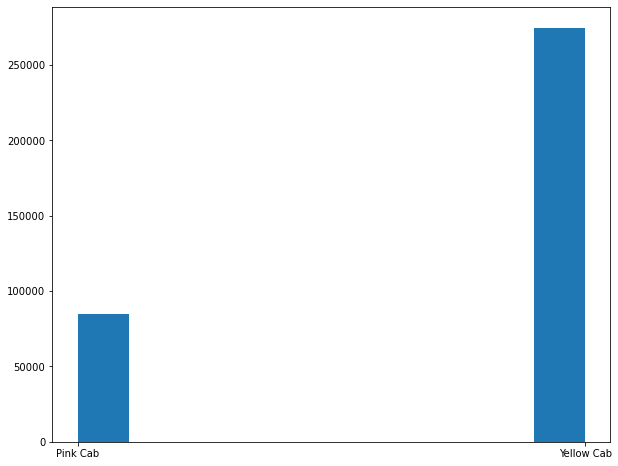

In [34]:
#showing the number of transactions made by each company
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(cab_trans_cust_city['Company'])
plt.show()

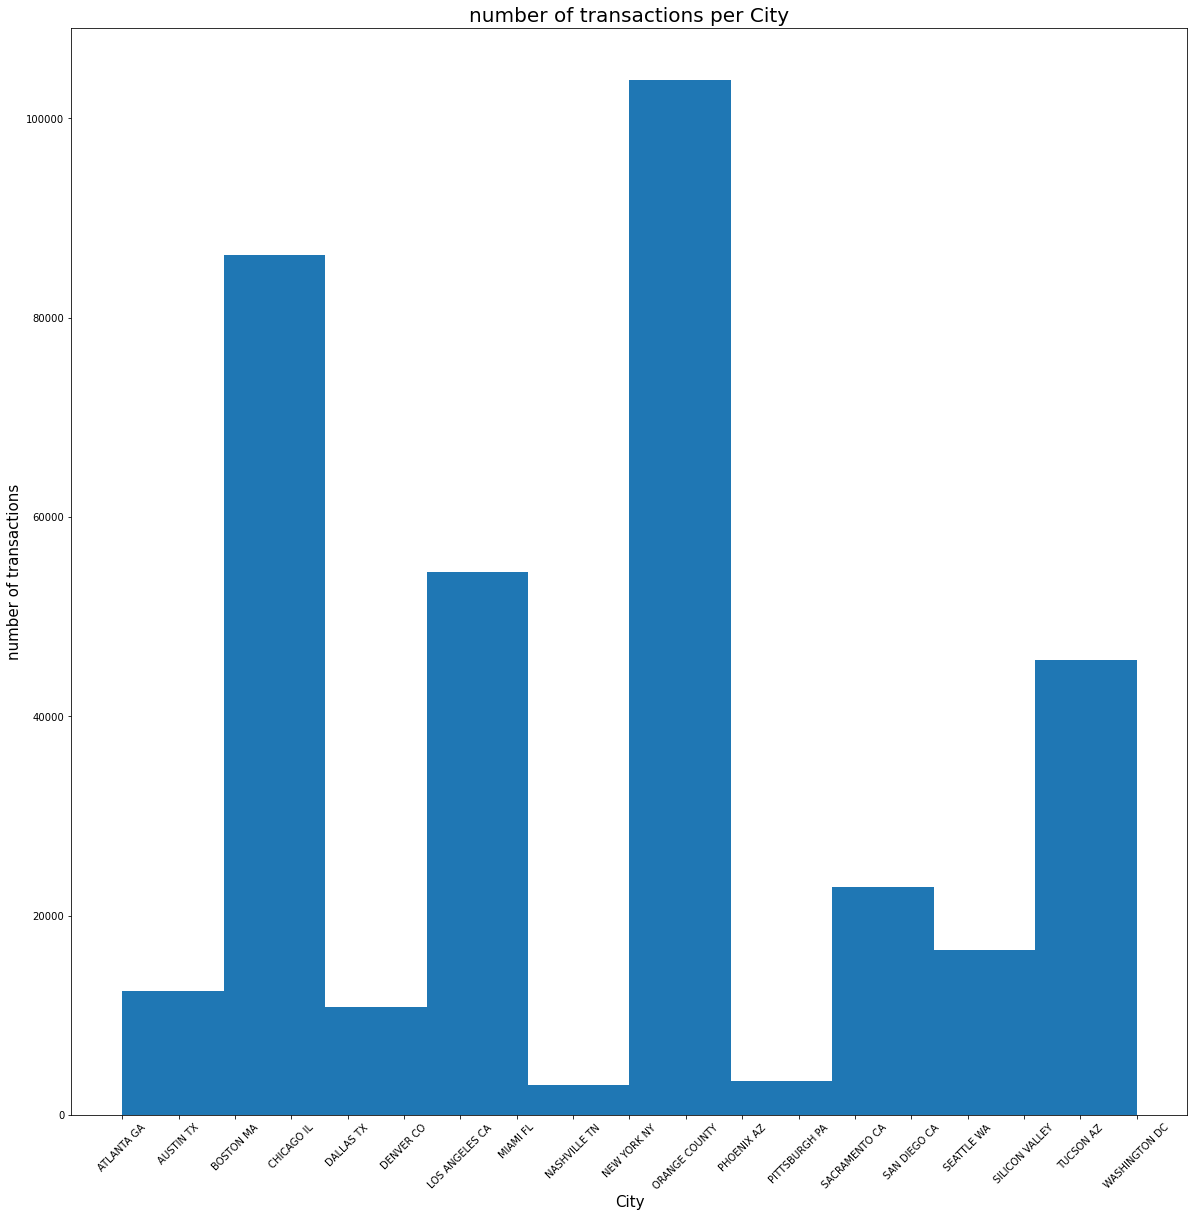

(array([ 12453.,  86317.,  10842.,  54487.,   3010., 103867.,   3377.,
         22855.,  16516.,  45668.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

In [35]:
#showing the number of transaction per  city
diagram('City')

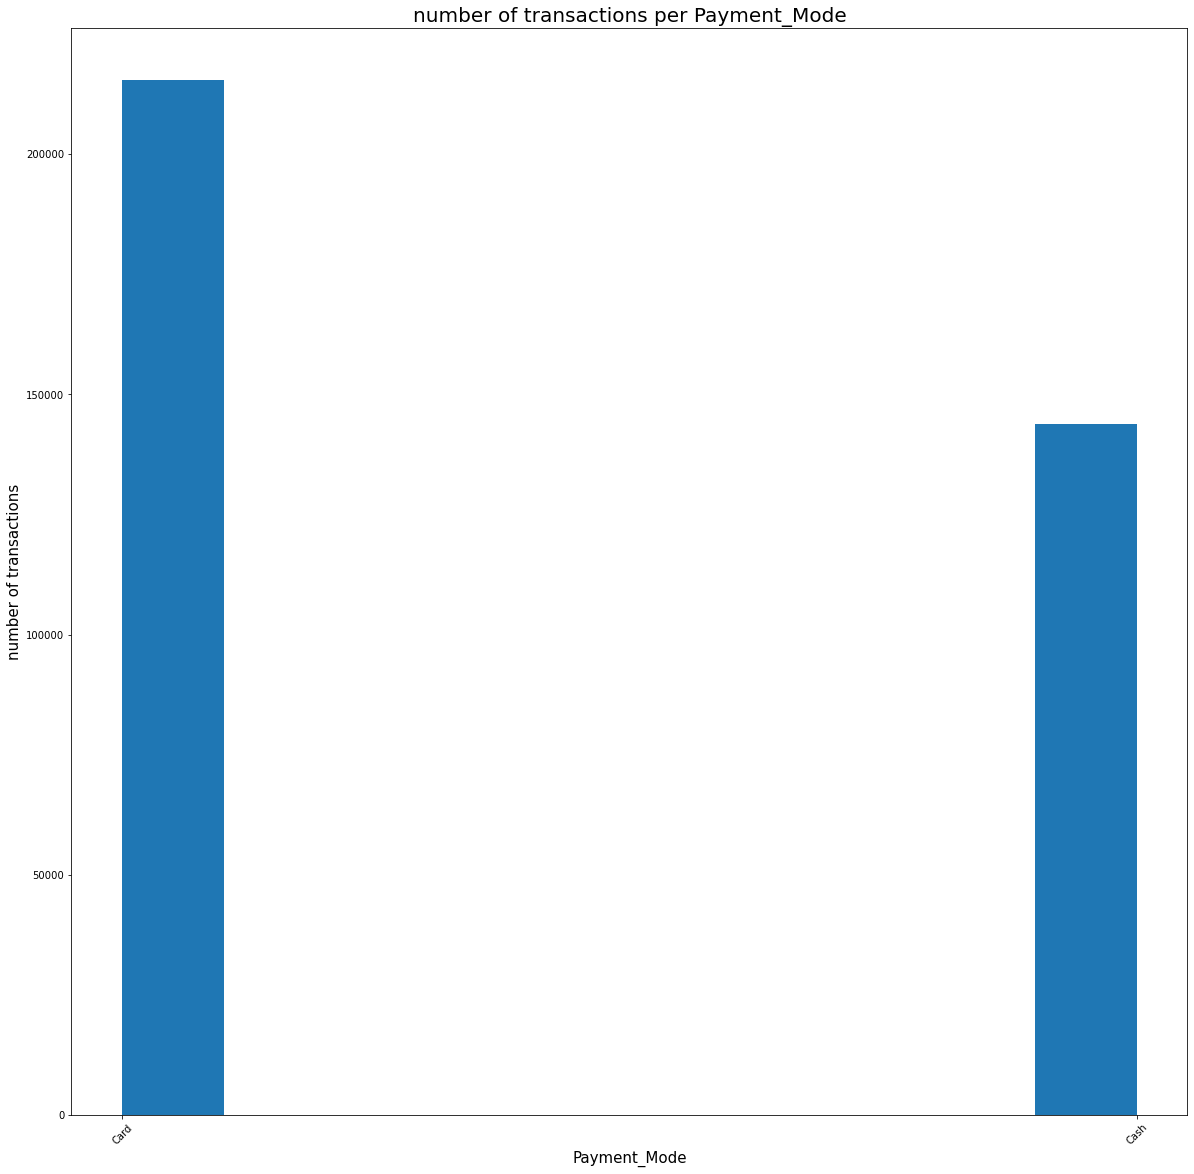

(array([215504.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 143888.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [36]:
#showing the number of transactions per payment_mode
diagram('Payment_Mode')

Most customers preferred to pay by card

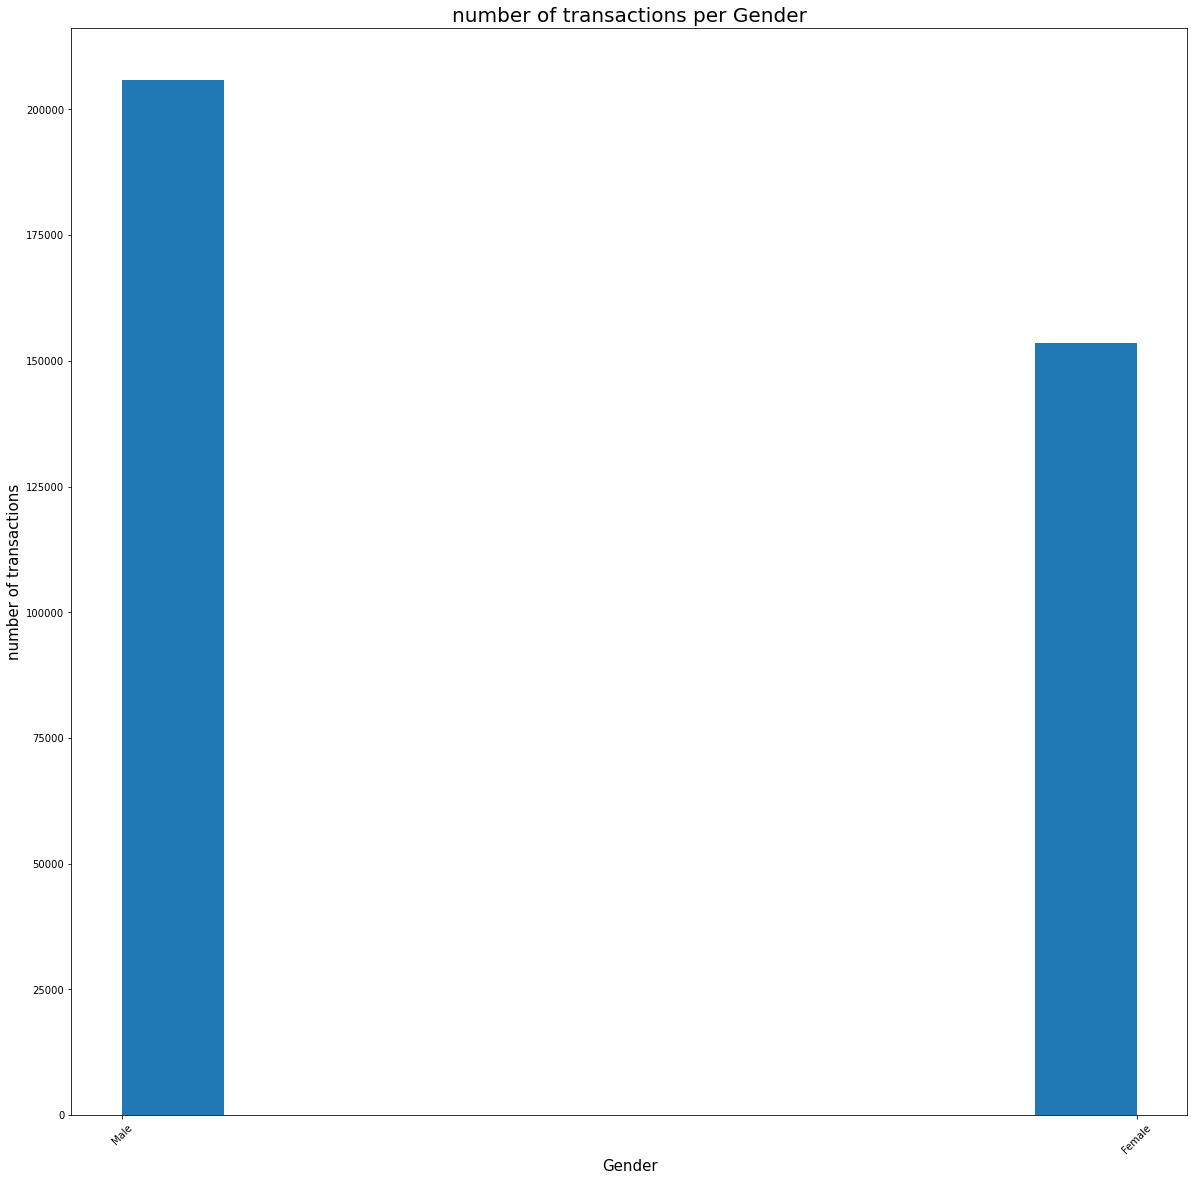

(array([205912.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 153480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [37]:
#showing the number of transactions per gender
diagram('Gender')

Most transactions were made by males followed by females

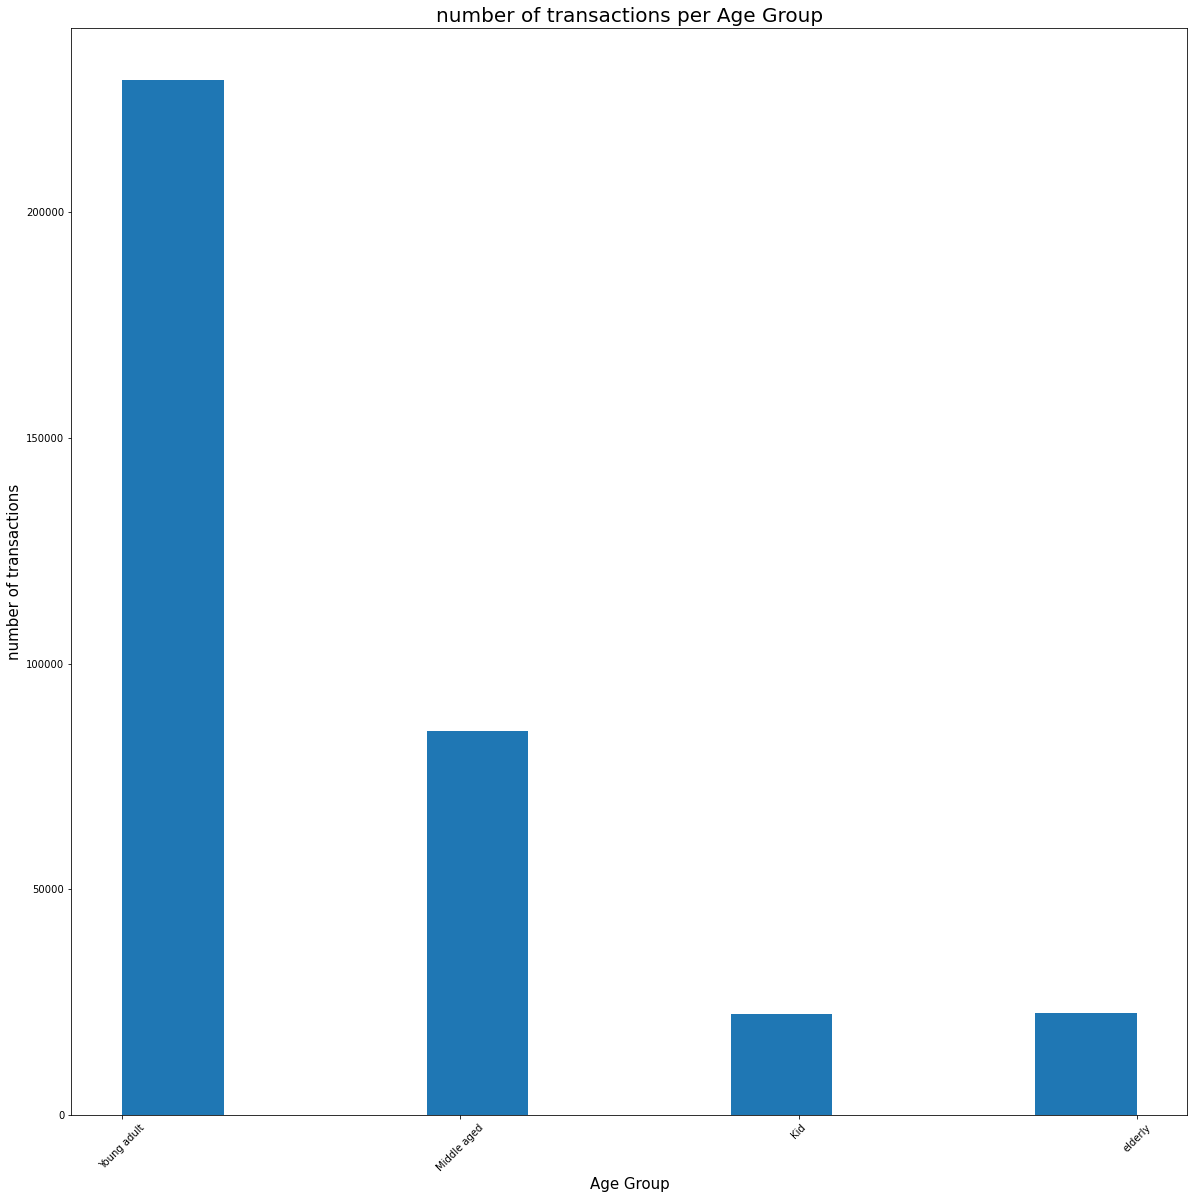

(array([229165.,      0.,      0.,  85104.,      0.,      0.,  22437.,
             0.,      0.,  22686.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

In [38]:
#showing the number of transactions per age_group
diagram('Age Group')

Most transactions were made by young adults followed by the middle aged
The least transactions were made by the elderly and kids

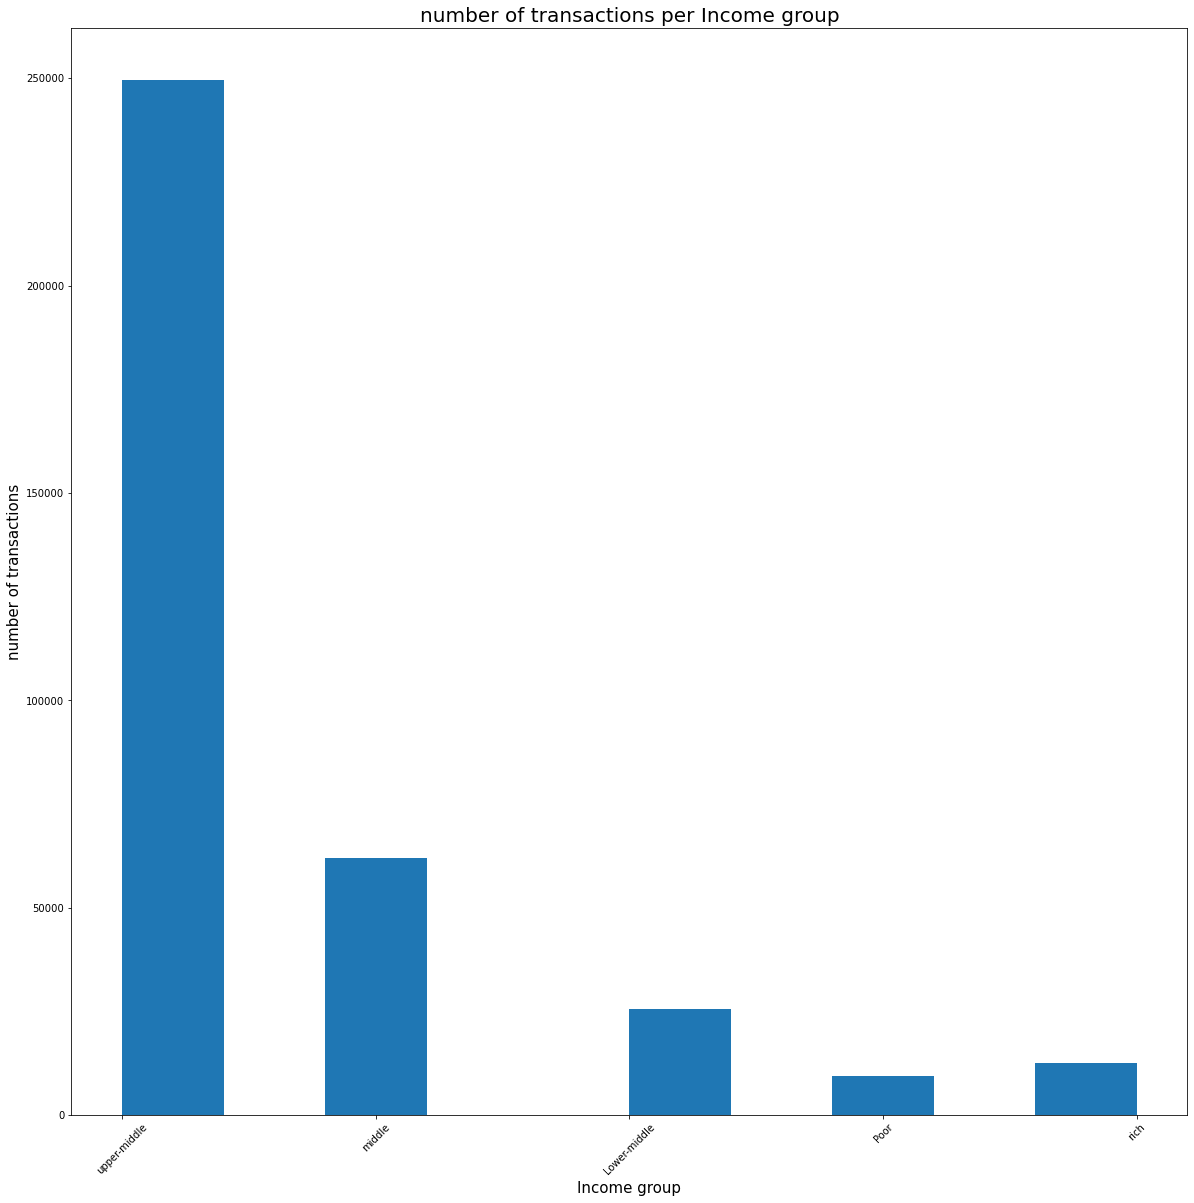

(array([249568.,      0.,  62021.,      0.,      0.,  25516.,      0.,
          9567.,      0.,  12720.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

In [39]:
#showing the number of transactions for income group
diagram('Income group')

most transactions was made by the upper-middle class followed by the middle income class

the poor and the rich made little transactions

#### Bivariate analysis 

<AxesSubplot:xlabel='Company'>

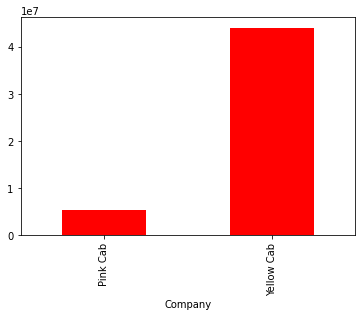

In [40]:
cab_trans_cust_city.groupby(['Company'])['profit'].sum().plot(kind='bar',color='red')

most profits were made by the Yellow Cab as compared to the pink cab

<AxesSubplot:xlabel='Company'>

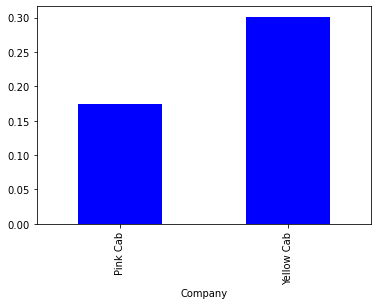

In [41]:
cab_trans_cust_city.groupby(['Company'])['profit margin'].mean().plot(kind='bar',color='blue')

The yellow cab has a higher profit margin of 30 percent while the pink cab has a profit margin of approximately 0.18 percent

<AxesSubplot:xlabel='Company'>

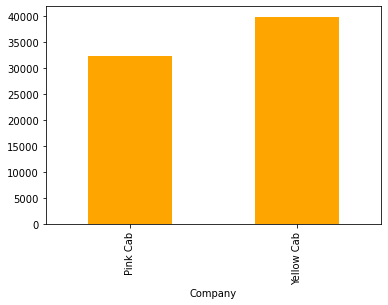

In [42]:
cab_trans_cust_city.groupby(['Company'])['Customer ID'].nunique().plot(kind='bar',color='orange')

The yellow cab has the most customers followed by the pink cab 

<AxesSubplot:xlabel='City'>

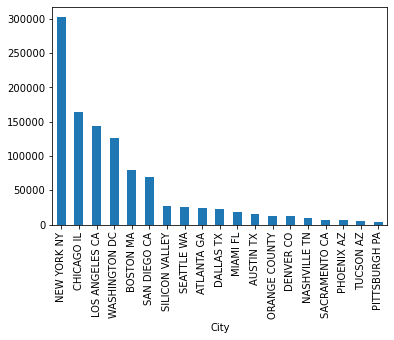

In [43]:
cab_trans_cust_city.groupby(['City'])['Users'].mean().sort_values(ascending=False).plot(kind='bar')

NewYork had the highest number of cab users followed by chicago,then los angeles followed by washington dc

Pittsburgh had the lowest number of cab users

TUscon had the second least number of cab users

### Multivariate analysis

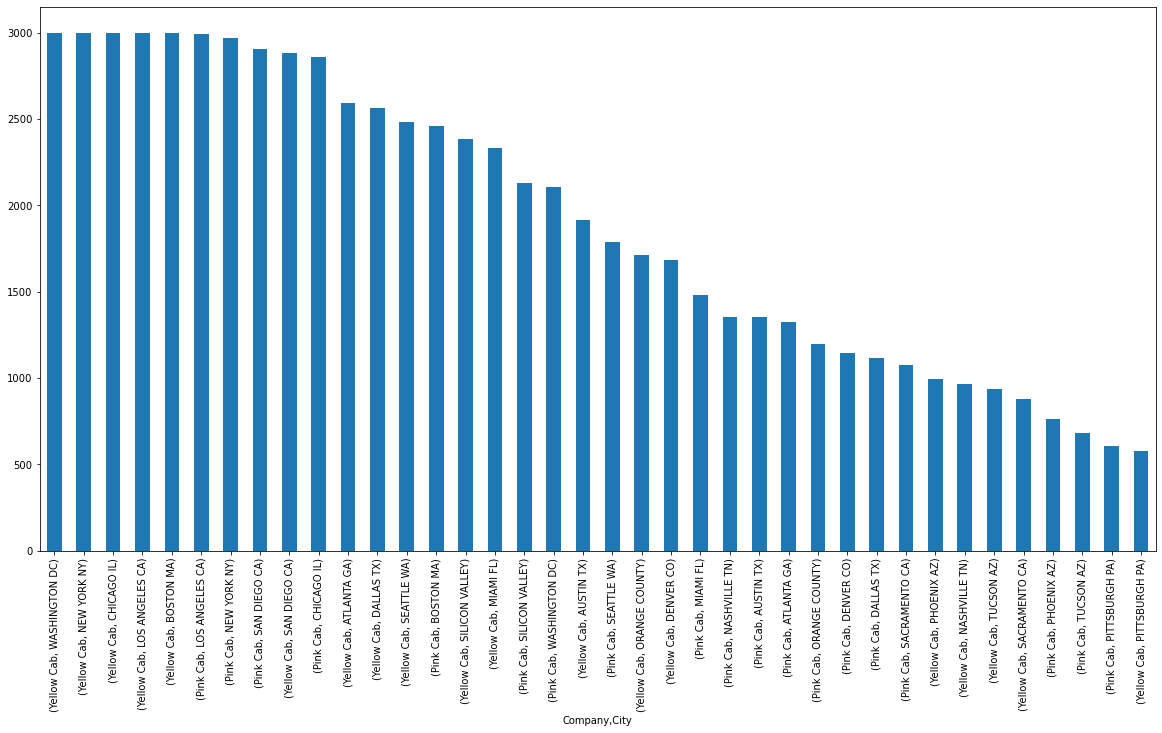

In [44]:
fig,ax=plt.subplots(figsize=(20,10))
cab_trans_cust_city.groupby(['Company','City'])['Customer ID'].nunique().sort_values(ascending=False).plot(kind='bar',stacked='true')
plt.show()

### Recommendations

We suggest choosing the yellow cab company over the pink cab:
* Yellow Cab has higher rate of return than Pink cab
* Yellow cab had a higher number of users than the Pink Cab
* Most Transactions were made through card payments followed by cash so offer card payment services across all cities
* New york city has the most number of users followed by chicago